<a href="https://colab.research.google.com/github/YanfeiWang3973/python-projects/blob/main/kingst_project_yanfei_wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data from web
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

#type(travel_times_url)
#using pandas to read the url data 
travel_times = pd.read_csv(travel_times_url)

#display a sample of the data
travel_times.tail() 

,result_id,datetime_bin,day_type,category,period_name,tt,obs
1477747,EA_BV_QU_BV,2017-12-31 22:50:00,Weekend,Pilot,Evening,34.5,2
1477748,EA_BV_QU_BV,2017-12-31 23:00:00,Weekend,Pilot,NaN,33.0,1
1477749,EA_BV_QU_BV,2017-12-31 23:05:00,Weekend,Pilot,NaN,35.0,1
1477750,EA_BV_QU_BV,2017-12-31 23:35:00,Weekend,Pilot,NaN,30.0,1
1477751,EA_BV_QU_BV,2017-12-31 23:50:00,Weekend,Pilot,NaN,51.0,1


In [ ]:
!pip install geopandas #install : !pip -- name of the library you want to install 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 56.5 MB/s 
     |████████████████████████████████| 16.7 MB 53.5 MB/s 


In [ ]:
import geopandas as gpd #use geo files to translate the street names into actual st names

In [ ]:
# GeoJSON file that describes the segments
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

input_df = gpd.read_file(url_seg)

input_df.tail() #geo json file display 

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
133,FR_YO_FR_UN,Front,WB,Yonge,University,448,"MULTILINESTRING ((-79.37697 43.64688, -79.3770..."
134,FR_YO_KN_YO,Yonge,NB,Front,King,259,"MULTILINESTRING ((-79.37697 43.64688, -79.3773..."
135,KN_PA_QU_PA,Parliament,NB,King,Queen,372,"MULTILINESTRING ((-79.36325 43.65273, -79.3634..."
136,FR_BA_FR_SP,Front,EB,Bathurst,Spadina,609,"MULTILINESTRING ((-79.40142 43.64075, -79.4007..."
137,FR_BA_KN_BA,Bathurst,NB,Front,King,399,"MULTILINESTRING ((-79.40142 43.64075, -79.4016..."


**Yonge to Jarvis**

In [ ]:
#finding seg name of Yonge to Jarvis
def get_segment(street_name, from_street, to_street, input_df):
  df1 = input_df[input_df['street']=='King']  #input_df is the url saved data of line segments 
  df2 = df1[df1['from_intersection']=='Yonge'] #from Yonge
  df3 = df2[df2['to_intersection']=='Jarvis'] #to Jarvis
  
  segment_code = df3['segment_name'].iloc[0]

  return segment_code


In [ ]:
get_segment('King', 'Yonge', 'Jarvis', input_df)

'KN_YO_KN_JA'

In [ ]:
segment_of_interest = get_segment('King', 'Yonge', 'Jarvis', input_df)
print(segment_of_interest) #get segment name

KN_YO_KN_JA


In [ ]:
yonge_jarvis= travel_times[travel_times['result_id'] == 'KN_YO_KN_JA']
yonge_jarvis.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,50.0,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,77.0,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,129.0,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,99.5,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,115.0,2


In [ ]:
yonge_jarvis['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

In [ ]:
#clean data
yonge_jarvis = yonge_jarvis.dropna(subset=['period_name'])

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
yonge_jarvis = yonge_jarvis[yonge_jarvis['category'] != 'Excluded']

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Pilot'], dtype=object)

analyze practice

In [ ]:
def get_anallysis(input_times, segment_of_interest, group_column, minutes): 
  yonge_jarvis = input_times[input_times['result_id'] == 'KN_YO_KN_JA']
  
  yonge_jarvis = yonge_jarvis.dropna(subset=['period_name'])

  yonge_jarvis = yonge_jarvis[yonge_jarvis['category'] != 'Excluded']

  compare_summary = yonge_jarvis.groupby(['category', group_column]).mean()

  compare_summary = compare_summary.reset_index()

  pivoted_data = compare_summary.pivot(index=group_column, columns='category', values='tt')

 # if minutes == true:
  #  pivoted_data = pivoted_data 

  pivoted_data['pct_diff'] = (pivoted_data['Pilot'] - pivoted_data['Baseline'])/pivoted_data['Baseline']*100

  return pivoted_data


analyze practice

In [ ]:
segment_of_interest = get_segment('King', 'Yonge', 'Jarvis', input_df)

get_anallysis(travel_times, segment_of_interest, 'period_name', True)

category,Baseline,Pilot,pct_diff
period_name,,,
AM Peak,106.689542,165.700000,55.310442
Afternoon,121.519231,292.961864,141.082718
Evening,112.717364,133.356000,18.310077
Midday,144.938258,162.703065,12.256810
Morning,95.299213,139.648148,46.536518
PM Peak,145.785294,192.757246,32.219952


In [ ]:
segment_of_interest = get_segment('King', 'Yonge', 'Jarvis', input_df)

get_anallysis(travel_times, segment_of_interest, 'period_name', False)

category,Baseline,Pilot,pct_diff
period_name,,,
AM Peak,106.689542,165.700000,55.310442
Afternoon,121.519231,292.961864,141.082718
Evening,112.717364,133.356000,18.310077
Midday,144.938258,162.703065,12.256810
Morning,95.299213,139.648148,46.536518
PM Peak,145.785294,192.757246,32.219952


Travel time in seconds
----------------
category    Baseline       Pilot   pct_diff
day_type                                   
Weekday   132.187818  159.828892  20.910455
Weekend   111.291602  193.236422  73.630731



Text(0.5, 1.0, 'Percent Change in Travel Time: Yonge to Jarvis')

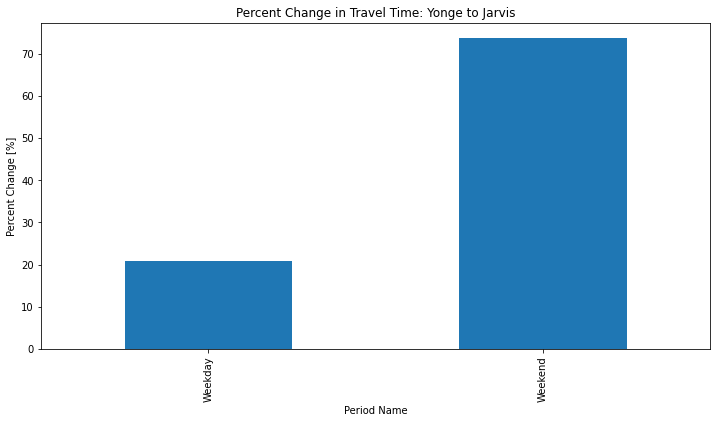

In [ ]:
# To change your analysis, you only have to change the variable names.
street = 'King'
from_street = 'Yonge'
to_street = 'Jarvis'
grouping_column = 'day_type'
minutes_bool = False
# --
# You do NOT have to change any code below this line.

time_unit = 'seconds'
if minutes_bool == True:
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to_street, input_df)

pivoted_data = get_anallysis(travel_times, segment_of_interest, grouping_column, minutes_bool)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
ax1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Period Name')

ax1.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to_street)

**Jarvis to Parliament**

In [ ]:
get_segment('King', 'Jarvis', 'Parliament', input_df)

'KN_YO_KN_JA'

In [ ]:
seg_jar_par = get_segment('King', 'Jarvis', 'Parliament', input_df)
print(seg_jar_par)

KN_YO_KN_JA


In [ ]:
segment_of_interest = get_segment('King', 'Jarvis', 'Parliament', input_df)

get_anallysis(travel_times, segment_of_interest, 'period_name', True)



category,Baseline,Pilot,pct_diff
period_name,,,
AM Peak,106.689542,165.700000,55.310442
Afternoon,121.519231,292.961864,141.082718
Evening,112.717364,133.356000,18.310077
Midday,144.938258,162.703065,12.256810
Morning,95.299213,139.648148,46.536518
PM Peak,145.785294,192.757246,32.219952


Travel time in seconds
----------------
category    Baseline       Pilot   pct_diff
day_type                                   
Weekday   132.187818  159.828892  20.910455
Weekend   111.291602  193.236422  73.630731



Text(0.5, 1.0, 'Percent Change in Travel Time: Jarvis to Parliament')

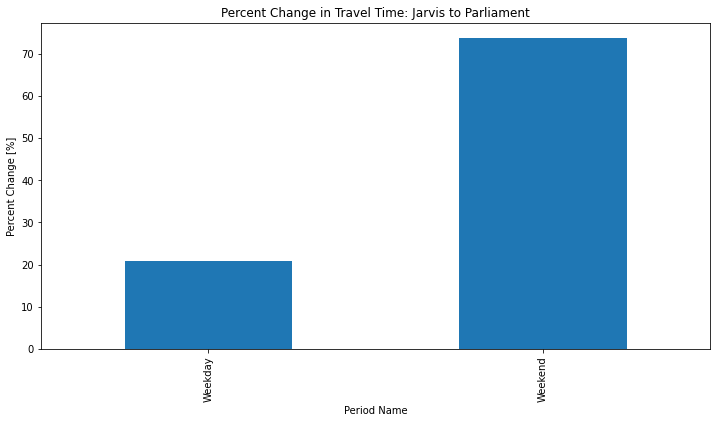

In [ ]:
# To change your analysis, you only have to change the variable names.
street = 'King'
from_street = 'Jarvis'
to_street = 'Parliament'
grouping_column = 'day_type'
minutes_bool = False
# --
# You do NOT have to change any code below this line.

time_unit = 'seconds'
if minutes_bool == True:
    time_unit = 'minutes'

segment_of_interest = get_segment(street, from_street, to_street, input_df)

pivoted_data = get_anallysis(travel_times, segment_of_interest, grouping_column, minutes_bool)

# Print the pivoted data
print('Travel time in ' + time_unit)
print('----------------')
print(pivoted_data)

print('')
# Plot the pivoted data
ax1 = pivoted_data['pct_diff'].plot(kind='bar', figsize=(12, 6))

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Period Name')

ax1.set_title('Percent Change in Travel Time: ' + from_street + ' to ' + to_street)